In [1]:
import pandas as pd
pd.options.display.float_format = '{:.0f}'.format
columns = "id,date,username,tweet,exploit"

df = pd.read_csv('DATASET.csv', usecols=columns.split(","))  

In [2]:
# NLP Text Pre-Processing
import re
import nltk
from nltk.tokenize import RegexpTokenizer, TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords 

nltk.download("stopwords", "stopwords")
nltk.data.path.append('stopwords/')
nltk.download("wordnet", "wordnet")
nltk.data.path.append('wordnet/')

stop_words = set(stopwords.words('english'))
stop_words_alexfrancow = ['http','2019','2018','cve','2020']

def remove_URL(x):
    return re.sub(r"http\S+", "", x)

def tokenize(x):
    tokenizer = TweetTokenizer()
    return tokenizer.tokenize(x.lower())

def tokenize_remove_regex(x):
    listToStr = ' '.join([str(elem) for elem in x]) 
    tokenizer = RegexpTokenizer(r'http|2019|2018|cve|2020| |\.|,|:|;|!|\?|\(|\)|\||\+|\'|"|‘|’|“|”|\'|\’|…|\-|–|—|\$|&|\*|>|<|\/|\[|\]', gaps=True)
    return tokenizer.tokenize(listToStr)

def stemmer(x):
    stemmer = PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in x])
 
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in x])

df['tweet'] = df['tweet'].map(remove_URL)
df['tokens'] = df['tweet'].map(tokenize)
df['tokens'] = df['tokens'].map(tokenize_remove_regex)
df['lemma'] = df['tokens'].map(lemmatize)
df['stems'] = df['tokens'].map(stemmer)
# No stopwords takes a while
# out list
#df['no_stopwords'] = df['tokens'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
# out string
df['no_stopwords'] = df['tokens'].apply(lambda x: ' '.join([word for word in x if word not in stopwords.words('english')]))
#df.to_csv(r'NIST_Exploit_no_stopwords.csv')
df

[nltk_data] Downloading package stopwords to stopwords...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to wordnet...
[nltk_data]   Package wordnet is already up-to-date!


,id,date,username,tweet,exploit,tokens,lemma,stems,no_stopwords
0,1340000000000000000,12/9/2020,sunshinecve,YOU GUYS.,0,"[you, guys]",you guy,you guy,guys
1,1340000000000000000,12/9/2020,thehackersnews,Apache releases an update to patch a potential...,0,"[apache, releases, an, update, to, patch, a, p...",apache release an update to patch a potential ...,apach releas an updat to patch a potenti remot...,apache releases update patch potential remote ...
2,1340000000000000000,12/9/2020,piedpiper1616,GitHub - Airboi/CVE-2020-17144-EXP: Exchange20...,1,"[github, airboi, 17144, exp, exchange, 2010, a...",github airboi 17144 exp exchange 2010 authoriz...,github airboi 17144 exp exchang 2010 author rce,github airboi 17144 exp exchange 2010 authoriz...
3,1340000000000000000,12/9/2020,sunshinecve,Well. Vasilis took his first unassisted step t...,0,"[well, vasilis, took, his, first, unassisted, ...",well vasilis took his first unassisted step to...,well vasili took hi first unassist step tonigh...,well vasilis took first unassisted step tonigh...
4,1340000000000000000,12/9/2020,avoorivex,Ø§Ù…ÛŒØ¯ÙˆØ§Ø±Ù… Ø³Ø§Ø²Ù…Ø§Ù†â€ŒÙ‡Ø§ÛŒ Ù…Ø§ Ø­...,0,"[ø, §, ù, ûœø, ¯, ùˆø, §, ø, ±, ù, ø, ³, ø, §,...",ø § ù ûœø ¯ ùˆø § ø ± ù ø ³ ø § ø ² ù ø § ù † ...,ø § ù ûœø ¯ ùˆø § ø ± ù ø ³ ø § ø ² ù ø § ù † ...,ø § ù ûœø ¯ ùˆø § ø ± ù ø ³ ø § ø ² ù ø § ù † ...
...,...,...,...,...,...,...,...,...,...
623,1230000000000000000,2/13/2020,jas502n,#CVE-2019-17564 Apache Dubbo unserialize RCE å...,1,"[#, 17564, apache, dubbo, unserialize, rce, å,...",# 17564 apache dubbo unserialize rce å   åº ...,# 17564 apach dubbo unseri rce å   åº  åˆ å...,# 17564 apache dubbo unserialize rce å   åº ...
624,1230000000000000000,2/13/2020,piedpiper1616,GitHub - irsl/CVE-2020-0728: Proof of Concept ...,1,"[github, irsl, 0728, proof, of, concept, code,...",github irsl 0728 proof of concept code for 0728,github irsl 0728 proof of concept code for 0728,github irsl 0728 proof concept code 0728
625,1230000000000000000,2/12/2020,pyn3rd,#CVE-2019-17564 Apache Dubbo deserialization R...,1,"[#, 17564, apache, dubbo, deserialization, rce]",# 17564 apache dubbo deserialization rce,# 17564 apach dubbo deseri rce,# 17564 apache dubbo deserialization rce
626,1230000000000000000,2/11/2020,piedpiper1616,GitHub - padovah4ck/CVE-2020-0683: CVE-2020-06...,1,"[github, padovah, 4ck, 0683, 0683, windows, ms...",github padovah 4ck 0683 0683 window msi â € œi...,github padovah 4ck 0683 0683 window msi â € œi...,github padovah 4ck 0683 0683 windows msi â € œ...


In [3]:
# tokens in common lemma
from collections import Counter

vocab = Counter()
for document in df['stems']:
    tokens = document.split()
    vocab.update(tokens)
    
print(len(vocab))
print(vocab.most_common(100))

3502
[('ã', 1601), ('\x81', 1496), ('‚', 656), ('€', 395), ('ø', 378), ('§', 293), ('ãƒ', 284), ('å', 279), ('æ', 254), ('the', 238), ('ù', 237), ('¼', 234), ('„', 225), ('®', 212), ('¨', 203), ('to', 188), ('in', 184), ('†', 180), ('a', 171), ('™', 160), ('‡', 158), ('¯', 156), ('±', 156), ('of', 149), ('‹', 144), ('for', 143), ('ðÿ', 138), ('and', 132), ('¦', 131), ('è', 131), ('\x8f', 130), ('ç', 129), ('¥', 128), ('©', 127), ('³', 125), ('exploit', 122), ('¾', 119), ('‰', 117), ('vulner', 114), ('«', 109), ('£', 100), ('¤', 99), ('»', 96), ('â', 94), ('ï', 92), ('¹', 90), ('½', 89), ('´', 87), ('•', 87), ('¸', 86), ('œã', 85), ('\x8d', 82), ('\xad', 81), ('¡', 81), ('rce', 77), ('poc', 77), ('is', 76), ('ä', 76), ('#', 76), ('s', 70), ('¬', 68), ('˜', 66), ('°', 66), ('é', 66), ('on', 65), ('i', 64), ('window', 63), ('¿', 61), ('¢', 61), ('\x9d', 60), ('it', 59), ('ÿã', 59), ('code', 58), ('with', 58), ('›', 56), ('1', 55), ('=', 54), ('\x90', 53), ('execut', 50), ('·', 50), ('0', 

In [4]:
# Modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB


# Train/test
X = df['stems']
y = df['exploit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13)

In [5]:
# Train bayes classifier MultinomialNB

pipe_mnnb = Pipeline(steps = [('tf', TfidfVectorizer()), ('mnnb', MultinomialNB())])

# Parameter grid
pgrid_mnnb = {
    'tf__max_features' : [1000, 2000, 3000],
    'tf__stop_words' : ['english', stop_words_alexfrancow],
    'tf__ngram_range' : [(1,1),(1,2)],
    'tf__use_idf' : [True, False],
    'mnnb__alpha' : [0.1, 0.5, 1]
}

gs_mnnb = GridSearchCV(pipe_mnnb, pgrid_mnnb, cv=5, n_jobs=-1)
gs_mnnb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('mnnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'mnnb__alpha': [0.1, 0.5, 1],
                         'tf__max_features': [1000, 2000, 3000],
                         'tf__ngram_range': [(1, 1), (1, 2)],
                         'tf__stop_words': ['english',
                                            ['http', '2019', '2018', 'cve',
                                             '2020']],
                         'tf__use_idf': [True, False]})

Accuracy: 0.7770700636942676


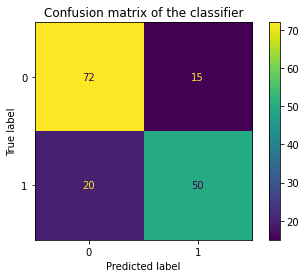

In [6]:
# Confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, accuracy_score

y_pred_class = gs_mnnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_class))
plot_confusion_matrix(gs_mnnb, X_test, y_test)
plt.title('Confusion matrix of the classifier')
plt.show()

In [10]:
# Predict
text = """Easy RCE using Docker API on port 2375/tcp

docker -H <host>:2375 run --rm -it --privileged --net=host -v /:/mnt alpine

File Access: cat /mnt/etc/shadow
RCE: chroot /mnt

#ptswarmTechniques"""

dfpre = ""
dfpre = pd.DataFrame({'Tweet': text}, index=[0])
dfpre['Tweet'] = dfpre['Tweet'].map(remove_URL)
dfpre['tokens'] = dfpre['Tweet'].map(tokenize)
dfpre['tokens'] = dfpre['tokens'].map(tokenize_remove_regex)
dfpre['lemma'] = dfpre['tokens'].map(lemmatize)
dfpre['stems'] = dfpre['tokens'].map(stemmer)

print("Result:", gs_mnnb.predict(dfpre['stems']))
dfpre

Result: [1]


,Tweet,tokens,lemma,stems
0,Easy RCE using Docker API on port 2375/tcp\n\n...,"[easy, rce, using, docker, api, on, port, 2375...",easy rce using docker api on port 2375 tcp doc...,easi rce use docker api on port 2375 tcp docke...


In [12]:
# Predict
text = """CVE-2020-35457 ** DISPUTED ** GNOME GLib before 2.65.3 has an integer overflow, that might lead to an out-of-bounds write, in g_option_group_add_entries. NOTE: the vendor's position is "Realistically this is not a security issue. 
The standard pattern is... https://cve.mitre.org/cgi-bin/cvename.cgi?name=CVE-2020-35457"""

dfpre = ""
dfpre = pd.DataFrame({'Tweet': text}, index=[0])
dfpre['Tweet'] = dfpre['Tweet'].map(remove_URL)
dfpre['tokens'] = dfpre['Tweet'].map(tokenize)
dfpre['tokens'] = dfpre['tokens'].map(tokenize_remove_regex)
dfpre['lemma'] = dfpre['tokens'].map(lemmatize)
dfpre['stems'] = dfpre['tokens'].map(stemmer)

print("Result:", gs_mnnb.predict(dfpre['stems']))
dfpre

Result: [1]


,Tweet,tokens,lemma,stems
0,#CVE-2020-17530 (S2-061) Struts2 OGNL Expressi...,"[#, 17530, s2, 061, struts, 2, ognl, expressio...",# 17530 s2 061 strut 2 ognl expression remote ...,# 17530 s2 061 strut 2 ognl express remot code...


In [13]:
# Save model
from joblib import dump, load
dump(gs_mnnb, 'TW_exploit_detect_NLP_Modelv1.joblib') 

# Load
#gs_mnnb = load('Modelv1.joblib') 

['TW_exploit_detect_NLP_Modelv1.joblib']